In [1]:
# 数据处理所需的库
import random
import numpy as np
import pandas as pd

# 数据可视化所需的库
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 机器学习预处理所需的库 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 机器学习算法所需的库
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 机器学习评价指标所需的库
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, r2_score 
from sklearn.metrics import classification_report

# 其他所需的库
import warnings
warnings.filterwarnings('ignore')

# 划分训练测试验证集

In [2]:
data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(
    data['data'], data['target'], test_size=0.2, random_state=2
)

# KNN

## 验证集调节超参数

&emsp;&emsp;**网格搜索搜不出来超参数时，就用验证集调节超参数。**

In [3]:
x_train1, x_valid, y_train1, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=2
)
for neighbor_num in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=neighbor_num)
    model.fit(x_train1, y_train1)
    y_pred = model.predict(x_valid)
    print('邻居数目为：', neighbor_num)
    print('分类结果为：', y_pred)
    print('训练集精度为：', model.score(x_train1, y_train1))
    print('验证集精度为：', model.score(x_valid, y_valid))

邻居数目为： 1
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 1.0
验证集精度为： 0.9583333333333334
邻居数目为： 2
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.96875
验证集精度为： 0.9583333333333334
邻居数目为： 3
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.9479166666666666
验证集精度为： 0.9583333333333334
邻居数目为： 4
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.96875
验证集精度为： 0.9583333333333334
邻居数目为： 5
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.9479166666666666
验证集精度为： 0.9583333333333334
邻居数目为： 6
分类结果为： [1 2 2 0 0 1 1 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.9583333333333334
验证集精度为： 0.9583333333333334
邻居数目为： 7
分类结果为： [1 2 2 0 0 1 2 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.96875
验证集精度为： 1.0
邻居数目为： 8
分类结果为： [1 2 2 0 0 1 2 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.96875
验证集精度为： 1.0
邻居数目为： 9
分类结果为： [1 2 2 0 0 1 2 2 1 0 2 1 1 2 0 2 0 1 0 1 0 2 1 0]
训练集精度为： 0.96875
验证集精度为： 1.0


## 分类结果和精度

In [4]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train, y_train))
print('测试集精度为：', model.score(x_test, y_test))

分类结果为： [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]
训练集精度为： 0.975
测试集精度为： 0.9666666666666667


## 评价指标

In [5]:
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

模型的R方值： 0.951923076923077
模型混淆矩阵: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# 朴素贝叶斯

一般来说，如果样本特征的分布大部分是连续值且服从高斯分布，使用GaussianNB会比较好

如果样本特征的分布大部分是多元离散值，使用MultinomialNB会比较好

如果样本特征的分布是二元离散值或者很稀疏的多元离散值，应该使用BernoulliNB

## 分类结果和精度

In [6]:
model = GaussianNB()    
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train, y_train))
print('测试集精度为：', model.score(x_test, y_test))

分类结果为： [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]
训练集精度为： 0.95
测试集精度为： 0.9666666666666667


## 评价指标

In [7]:
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

模型的R方值： 0.951923076923077
模型混淆矩阵: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# 支持向量机

不同核函数:
如何选择适合您的数据集的最佳核函数完全取决于您实际解决的问题。如果您的数据能够被线性分割，那么毫无疑问，选择线性核函
数是一个不错的选择，因为它需要更少的训练时间，并在文本分类等大型数据集处理方面表现出色。另一方面，当数据缺乏额外信息
或不可用时，高斯核函数通常能够提供出色的结果。RBF核函数也是高斯核函数的一种，它通过将高维数据映射后，在其中寻找线性分
割。对于已经归一化的所有训练数据，多项式核函数通常能够产生出色的结果。

## 网格搜索超参数

In [8]:
data = load_iris()
X = data['data']
y = data['target']
# 二分类问题
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
x_train_svc, x_test_svc, y_train_svc, y_test_svc = train_test_split(
    X, y, test_size=0.2, random_state=2
)

model = SVC(probability=True, random_state=42)
param_grid = [{'C':np.arange(0.1, 10, 0.1)}]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_train_svc, y_train_svc)
grid_search.best_params_

{'C': 0.1}

## 分类结果和精度

In [9]:
model = SVC(C=grid_search.best_params_['C'],probability=True, random_state=42)
model.fit(x_train_svc, y_train_svc)
y_pred = model.predict(x_test_svc)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train_svc, y_train_svc))
print('测试集精度为：', model.score(x_test_svc, y_test_svc))

分类结果为： [1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1]
训练集精度为： 1.0
测试集精度为： 1.0


## 评价指标

In [10]:
print('模型的R方值：',r2_score(y_test_svc,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test_svc,y_pred))
print('模型分类报告:','\n',classification_report(y_test_svc,y_pred))

模型的R方值： 1.0
模型混淆矩阵: 
 [[13  0]
 [ 0  7]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



AUC: 1.00


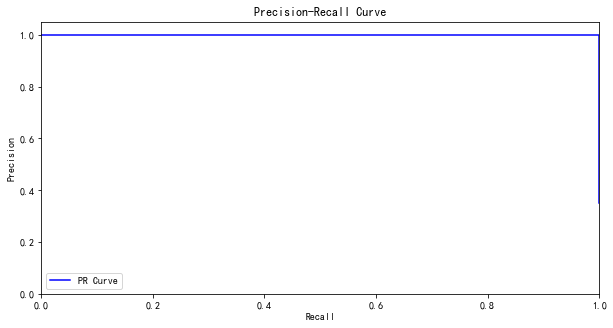

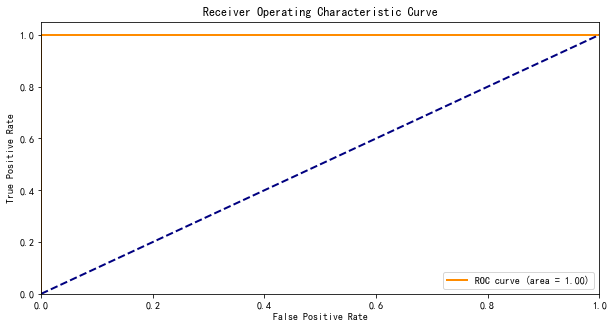

In [11]:
# 预测概率  
y_pred_prob = model.predict_proba(x_test_svc)[:,1]

# 计算PR曲线的指标  
precision, recall, thresholds = metrics.precision_recall_curve(y_test_svc, y_pred_prob)  
  
# 计算ROC曲线的指标  
fpr, tpr, thresholds_roc = metrics.roc_curve(y_test_svc, y_pred_prob)  
# 计算AUC值  
auc = metrics.auc(fpr, tpr)  
print('AUC: %.2f' % auc)
  
# 绘制PR曲线  
plt.figure(figsize=(10, 5))  
plt.plot(recall, precision, color='b', label='PR Curve')  
plt.xlabel('Recall')  
plt.ylabel('Precision')  
plt.ylim([0.0, 1.05])  
plt.xlim([0.0, 1.0])  
plt.title('Precision-Recall Curve')  
plt.legend(loc="lower left")  
plt.show()  
  
# 绘制ROC曲线  
plt.figure(figsize=(10, 5))  
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver Operating Characteristic Curve')  
plt.legend(loc="lower right")  
plt.show()

# 决策树

## 网格搜索超参数

In [12]:
data = load_iris()
X = data['data'][:, 2:]
y = data['target']
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(
    X, y, test_size=0.2, random_state=2
)

model =  DecisionTreeClassifier()
param_grid = [{'max_depth':np.arange(1, 10, 1)}]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_train_tree, y_train_tree)
grid_search.best_params_

{'max_depth': 1}

## 分类结果和精度

In [13]:
model =  DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)
model.fit(x_train_tree, y_train_tree)
y_pred = model.predict(x_test_tree)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train_tree, y_train_tree))
print('测试集精度为：', model.score(x_test_tree, y_test_tree))

分类结果为： [0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1]
训练集精度为： 0.65
测试集精度为： 0.7333333333333333


## 评价指标

In [14]:
print('模型的R方值：',r2_score(y_test_tree,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test_tree,y_pred))
print('模型分类报告:','\n',classification_report(y_test_tree,y_pred))

模型的R方值： 0.6153846153846154
模型混淆矩阵: 
 [[14  0  0]
 [ 0  8  0]
 [ 0  8  0]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.50      1.00      0.67         8
           2       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.60      0.73      0.64        30



## 可视化决策树

In [15]:
# tree_data=tree.export_graphviz(model,
#                                feature_names=data.feature_names[2:]
#                                ,class_names=data.target_names
#                                ,filled=True
#                                ,rounded=True)
# graph=graphviz.Source(tree_data)
# graph.view()

## 特征重要性

[('petal length (cm)', 1.0), ('petal width (cm)', 0.0)]


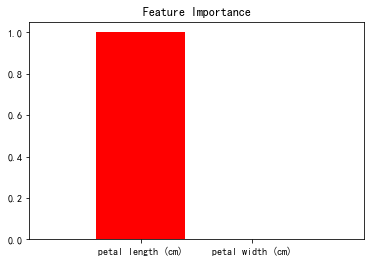

In [16]:
print([*zip(data.feature_names[2:],model.feature_importances_)])

import scikitplot as skplt
skplt.estimators.plot_feature_importances(
     model,feature_names=data.feature_names[2:])
plt.show()

## 二维决策边界

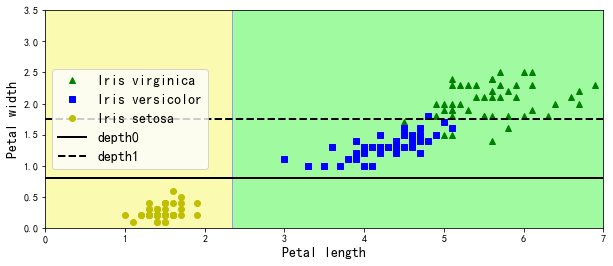

In [17]:
data = load_iris()
X = data['data'][:, 2:]
y = data['target']
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = model.predict(X_new)

# 实例实际位置
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

# 画等高线（带填充）
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
zz = y_predict.reshape(x0.shape)
plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2, label='depth0')
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2, label='depth1')

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()
# 首先第1个条件确定的决策左区域是纯的，所以不需要再分；决策右侧区域是不纯的，所以需要根据第2个条件再次划分。

# 集成学习

## XGB

### 网格搜索超参数

In [18]:
model = XGBClassifier()

# 可以通过print(XGBClassifier.__doc__) 查看文档
param_grid = [
    {'n_estimators':[3,10,30], 'max_depth':[1,2,3,4,5], 'learning_rate':[0.001,0.003,0.01]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_depth':[1,2,3,4,5], 'learning_rate':[0.005,0.03]}
]
# cv表示交叉验证的次数，scoring表示评价指标，分类可以选'accuracy'，'precision'，'recall'，'f1'，'roc_auc'，回归选neg_mean_squared_error
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_train, y_train)
# # 输出最优超参数组合
grid_search.best_params_

{'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 3}

### 分类结果和精度

In [19]:
model = XGBClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    learning_rate=grid_search.best_params_['learning_rate'])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train, y_train))
print('测试集精度为：', model.score(x_test, y_test))

分类结果为： [0 0 2 0 0 1 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]
训练集精度为： 0.9666666666666667
测试集精度为： 0.9333333333333333


### 评价指标

In [20]:
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

模型的R方值： 0.9038461538461539
模型混淆矩阵: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



### 特征重要性

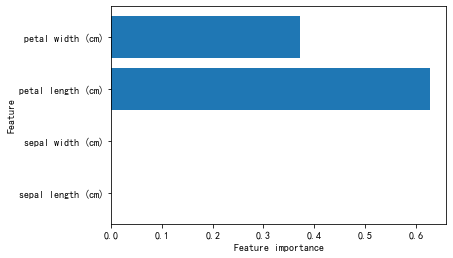

In [21]:
#自建函数
def plot_feature_importances_cancer(model):
    n_features = len(data.feature_names) 
    plt.barh(range(n_features), model.feature_importances_, align='center')  #条形图
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
 
 #执行函数
plot_feature_importances_cancer(model)

## 随机森林

### 网格搜索超参数

In [22]:
# 可以通过print(RandomForestClassifier.__doc__) 查看文档
model = RandomForestClassifier(random_state=42)
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}
]
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x_train, y_train)
# 输出最优超参数组合
grid_search.best_params_

{'max_features': 2, 'n_estimators': 3}

### 分类结果和精度

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('分类结果为：', y_pred)
print('训练集精度为：', model.score(x_train, y_train))
print('测试集精度为：', model.score(x_test, y_test))

分类结果为： [0 0 2 0 0 2 0 2 2 0 0 0 0 0 1 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2]
训练集精度为： 1.0
测试集精度为： 0.9666666666666667


### 评价指标

In [24]:
print('模型的R方值：',r2_score(y_test,y_pred))
print('模型混淆矩阵:','\n',confusion_matrix(y_test,y_pred))
print('模型分类报告:','\n',classification_report(y_test,y_pred))

模型的R方值： 0.951923076923077
模型混淆矩阵: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
模型分类报告: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### 特征重要性

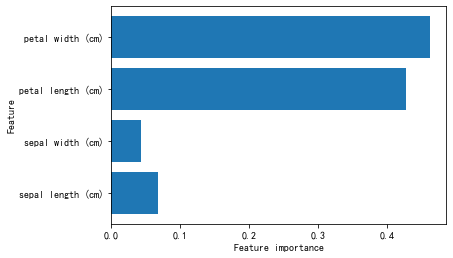

In [25]:
#自建函数
def plot_feature_importances_cancer(model):
    n_features = len(data.feature_names) 
    plt.barh(range(n_features), model.feature_importances_, align='center')  #条形图
    plt.yticks(np.arange(n_features), data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
 
 #执行函数
plot_feature_importances_cancer(model)

## 以随机森林为例保存模型

In [26]:
# import joblib
# # 保存模型
# joblib.dump(model, 'my_model.pkl')
# # 加载模型
# my_model_loaded = joblib.load('my_model.pkl')

# logistic回归

## 一维决策边界

维吉尼亚鸢尾的花瓣宽度范围为1.4-2.5cm，其他两种为0.1-1.8cm。对于宽度在1cm以下和2cm以上的可以很有信心判断，在这两个极端之间则不太有把握。

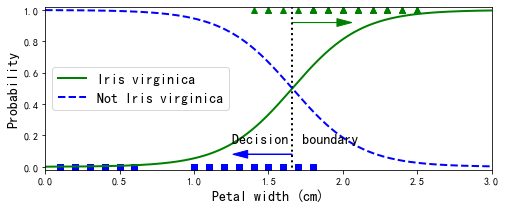

In [27]:
X = data['data'][:,3:]
y = (data['target']==2).astype(np.int64)
model = LogisticRegression()
model.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# y_proba是二维数组，第1列为类0的概率，第2列为类1的概率
y_proba = model.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
# 实例实际位置
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
# 画决策边界
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
# 画实例预测概率
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
# 增添挂件
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
# x,y尾部的坐标，dx,dy比尾部坐标偏了多少
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## 二维决策边界

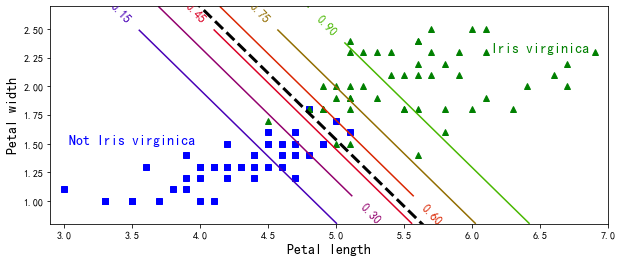

In [28]:
X = data['data'][:,2:]
y = (data['target']==2).astype(np.int64)
model = LogisticRegression()
model.fit(X, y)

# np.meshgrid将x中每一个数据和y中每一个数据组合生成很多点,然后将这些点的x坐标放入到X中,y坐标放入Y中,并且相应位置是对应的
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)

# 实例实际位置
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
# plt.contour画等高线
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
# plt.clabel添加标签
plt.clabel(contour, fontsize=12)
# 画决策边界
left_right = np.array([2.9, 7])
# theta0+theta1*x1+theta2*x2=0
boundary = -(model.coef_[0][0] * left_right + model.intercept_[0]) / model.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# softmax回归

由不同背景色展示的决策边界，任何两个类之间的决策边界都是线性的。在所有决策边界相交的地方，所有类的估算概率都为33%。

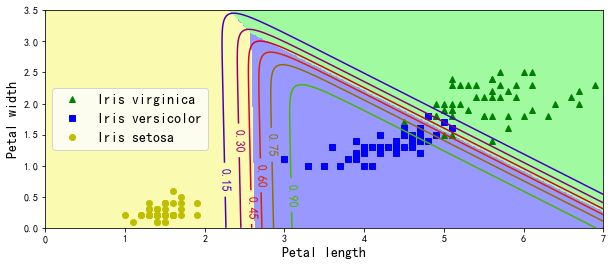

In [29]:
X = data['data'][:, 2:]  
y = data["target"]

# 多类时logistic默认是一对多的训练方式
# 不过将参数multi_class设置为"multinomial"，可以切换成softmax回归，并指定求解器为lbfgs
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
model.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(X_new)
y_predict = model.predict(X_new)

# 实例实际位置
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

# 画等高线（带填充）
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
zz = y_predict.reshape(x0.shape)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
# 画等高线
zz1 = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()